In [45]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv("C:/Users/radhi/Downloads/iris.csv")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [3]:
df.shape


(150, 5)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


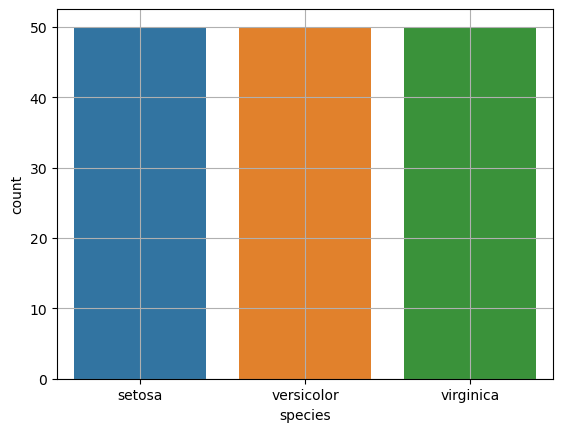

In [16]:
sns.countplot(df['species'])
plt.grid()
plt.show()

In [18]:
#correlation matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


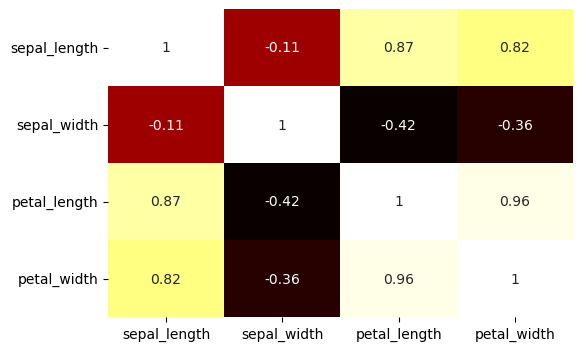

In [23]:
corr=df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cbar=False,cmap='hot')
plt.show()

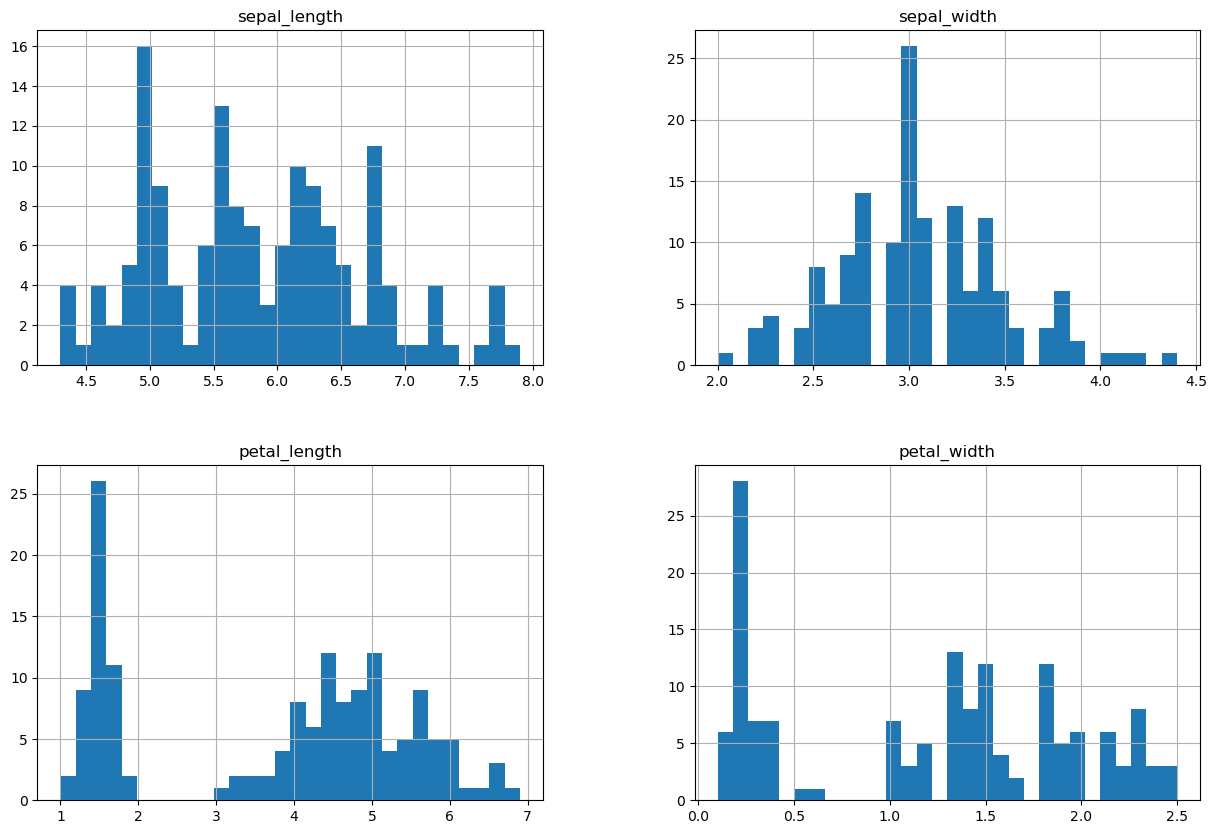

In [24]:
df.hist(bins=30,figsize=(15,10))
plt.show()

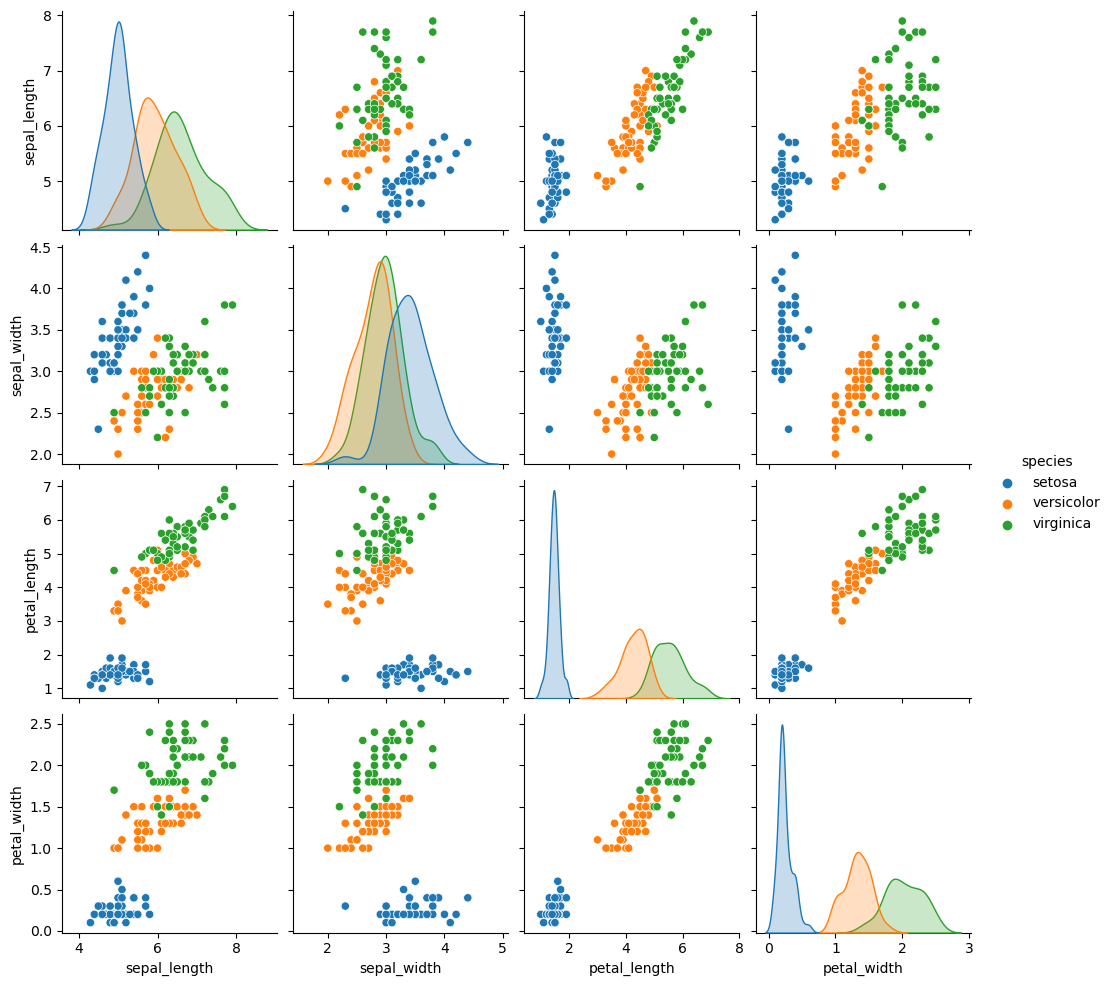

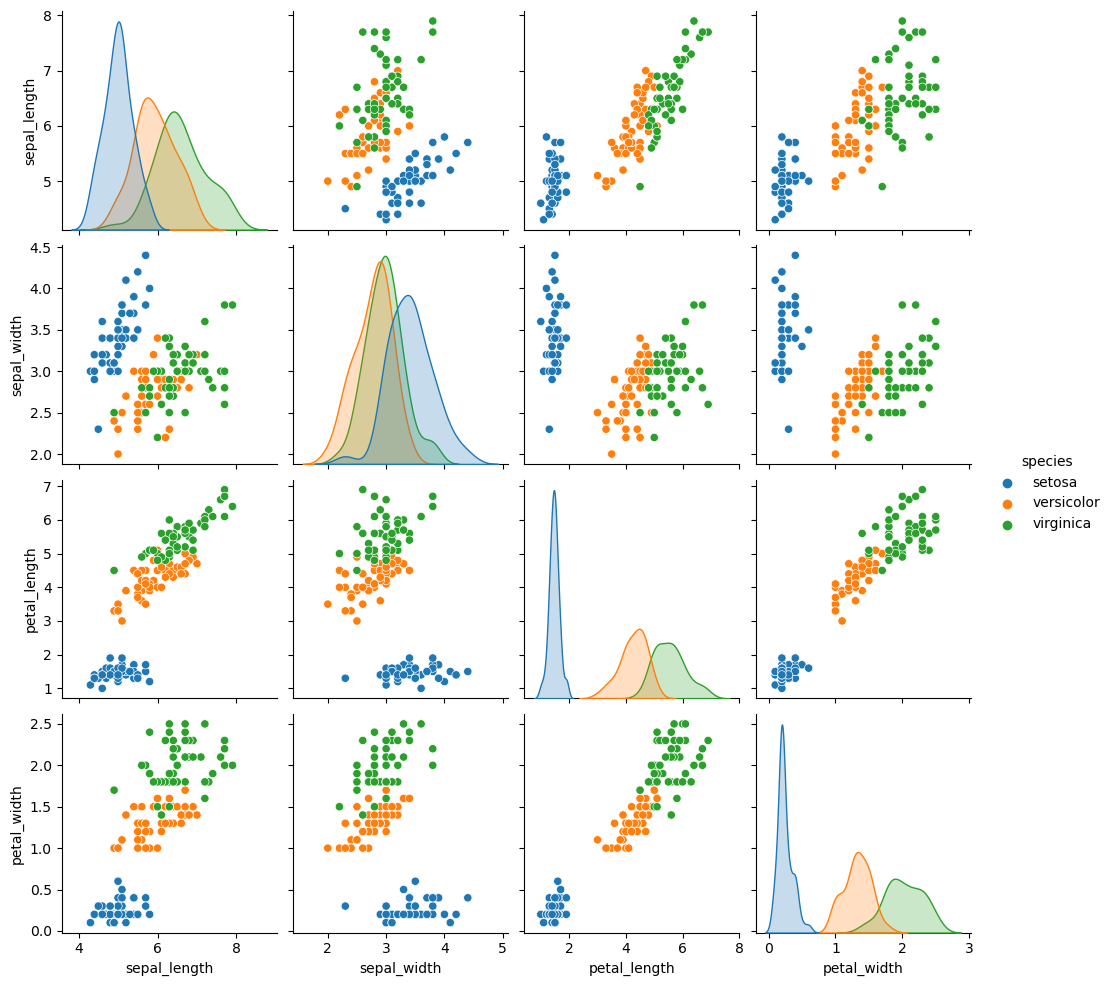

In [26]:
sns.pairplot(df,hue="species")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [31]:
df['species']=le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
x=df.drop(columns='species')
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
y=df['species']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [41]:
y.value_counts()   # setosa=0
                   #versicolor=1
                   #virginica=2

0    50
1    50
2    50
Name: species, dtype: int64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)


In [42]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
train_pred=model.predict(x_train)
error_score=mean_squared_error(y_train,train_pred)
print(error_score)

0.04663672465464826


In [47]:
test_pred=model.predict(x_test)
error_score=mean_squared_error(y_test,test_pred)
print(error_score)

0.045626630766750866


In [48]:
mae = mean_absolute_error(y_test, test_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.1450829950581556


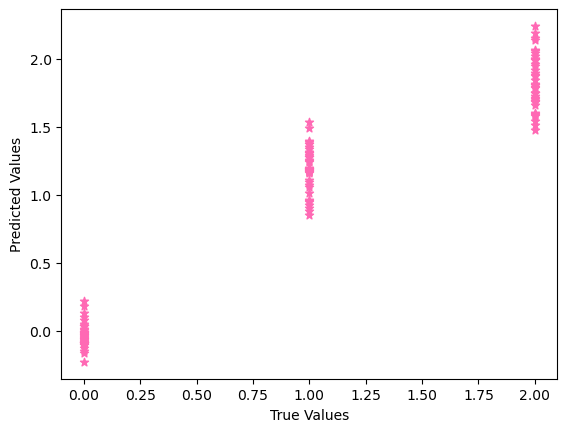

In [60]:
plt.scatter(y_train,train_pred,marker='*',c='hotpink')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

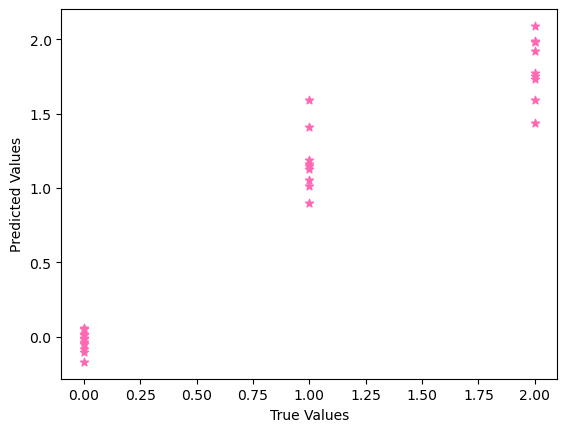

In [59]:
plt.scatter(y_test,test_pred,marker='*',c='hotpink')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [58]:
input=(5.7,2.9,4.2,1.3)
input_as_array=np.asarray(input)
input_as_array_reshape=input_as_array.reshape(1,-1)
pred=model.predict(input_as_array_reshape)
prediction=np.rint(pred)
print(prediction)
if prediction==1:
    print('the species is Versicolor')
elif prediction==0:
    print('the species is Setosa')
else:
    print('the species is Virginica')
    

[1.]
the species is Versicolor


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
